Found 4252 images belonging to 6 classes.
Found 906 images belonging to 6 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Number of samples in the training data: 426
Number of samples in the testing data: 91


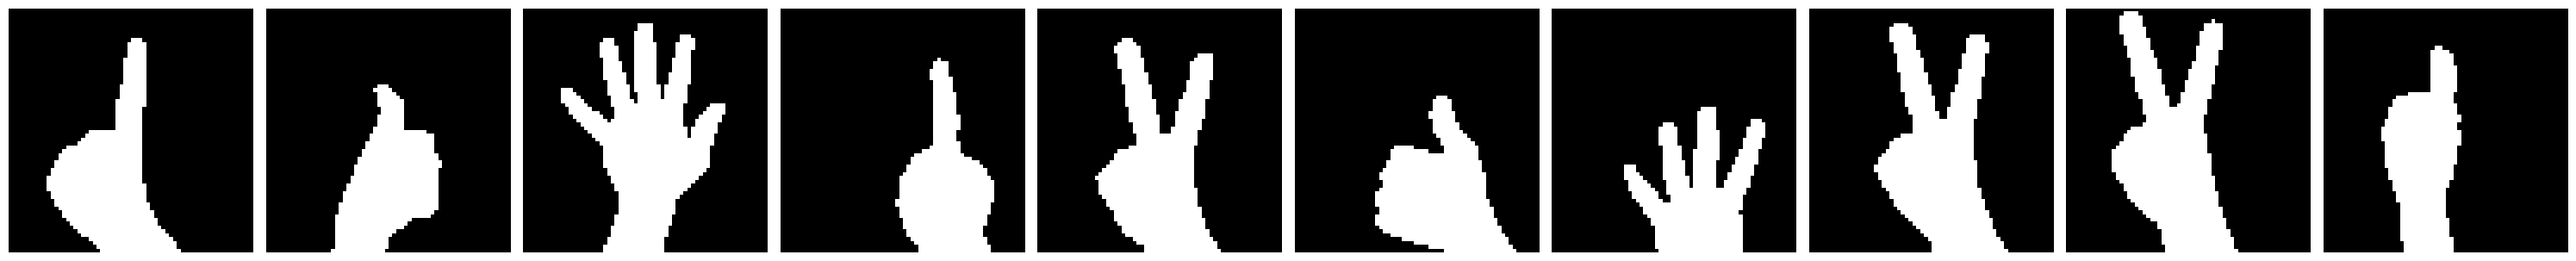

(10, 64, 64, 3)
[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]
Epoch 1/6
426/426 [==============================] - 9s 20ms/step - loss: 0.8387 - accuracy: 0.8215 - val_loss: 1.9966 - val_accuracy: 0.5894 - lr: 0.0010
Epoch 2/6
426/426 [==============================] - 8s 20ms/step - loss: 0.0333 - accuracy: 0.9932 - val_loss: 2.3551 - val_accuracy: 0.6159 - lr: 0.0010
Epoch 3/6
426/426 [==============================] - 8s 20ms/step - loss: 0.0114 - accuracy: 0.9972 - val_loss: 2.3962 - val_accuracy: 0.6126 - lr: 5.0000e-04
loss of 1.0119417905807495; accuracy of 80.0000011920929%
{'loss': [0.8387358784675598, 0.0333247035741806, 0.011444495059549809], 'accuracy': [0.821495771408081, 0.9931796789169312, 0.99717777967453], 'val_loss': [1.9965922832489014, 2.355102300643921, 2.3962137699127197], 'val_accuracy': [0.5894039869

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

predictions on a small set of test data--

Three   One   Three   Two   Three   Four   Three   Three   Four   One   

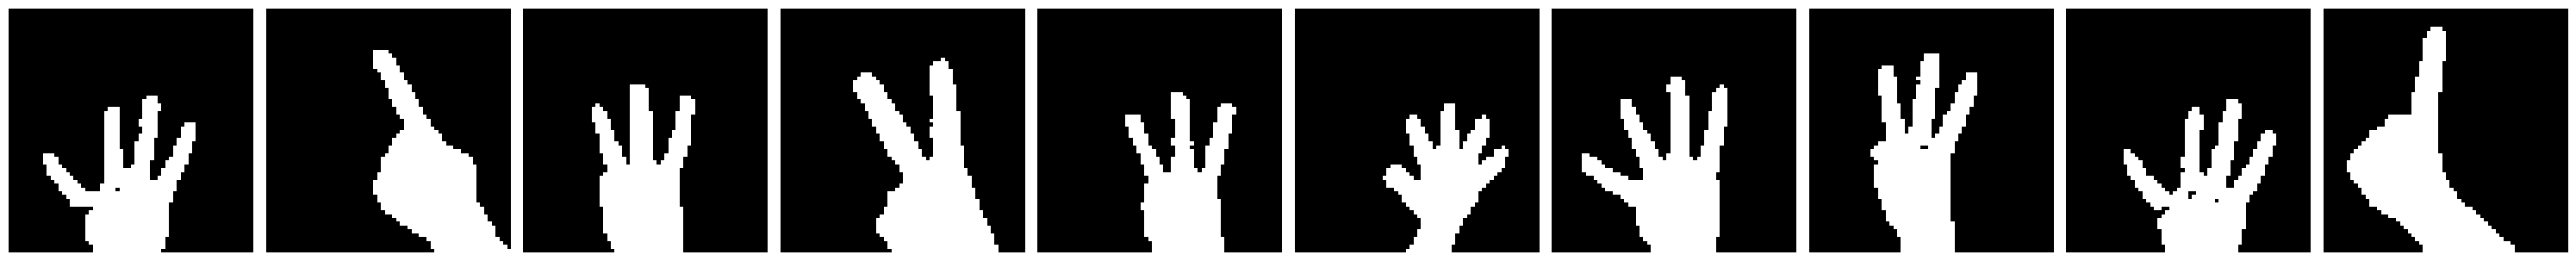

Actual labels
Four   One   Three   Two   Three   Five   Four   Three   Four   One   (10, 64, 64, 3)


{'loss': [0.8387358784675598, 0.0333247035741806, 0.011444495059549809],
 'accuracy': [0.821495771408081, 0.9931796789169312, 0.99717777967453],
 'val_loss': [1.9965922832489014, 2.355102300643921, 2.3962137699127197],
 'val_accuracy': [0.5894039869308472, 0.6158940196037292, 0.612582802772522],
 'lr': [0.001, 0.001, 0.0005]}

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import itertools
import random
import warnings
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
warnings.simplefilter(action='ignore', category=FutureWarning)


train_path = r'C:\Users\Nihal Mohan\AML Projecy\SignLanguage_AML\gesture\train'
test_path = r'C:\Users\Nihal Mohan\AML Projecy\SignLanguage_AML\gesture\test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(64,64), class_mode='categorical', batch_size=10,shuffle=True , classes=['1', '2', '3', '4', '5', '6'])
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(64,64), class_mode='categorical', batch_size=10, shuffle=True , classes=['1', '2', '3', '4', '5', '6'])

imgs, labels = next(train_batches)

print("Number of samples in the training data:", len(train_batches))
print("Number of samples in the testing data:", len(test_batches))
#Plotting the images...
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


plotImages(imgs)
print(imgs.shape)
print(labels)

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.2))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.3))
model.add(Dense(6,activation ="softmax"))


# In[23]:


model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')



model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0005)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')


history2 = model.fit(train_batches, epochs=6, callbacks=[reduce_lr, early_stop],  validation_data = test_batches)#, checkpoint])
imgs, labels = next(train_batches) # For getting next batch of imgs...

imgs, labels = next(test_batches) # For getting next batch of imgs...
scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')


#Saving the Model Created, Trained and Tested
#model.save('best_model_dataflair3.h5')

print(history2.history)

imgs, labels = next(test_batches)

model = keras.models.load_model(r"best_model_dataflair3.h5")

scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

model.summary()

scores #[loss, accuracy] on test data...
model.metrics_names


word_dict = {0: 'One', 1: 'Two', 2: 'Three', 3: 'Four', 4: 'Five', 5: 'Six'}

predictions = model.predict(imgs, verbose=0)
print("predictions on a small set of test data--")
print("")
for ind, i in enumerate(predictions):
    print(word_dict[np.argmax(i)], end='   ')

plotImages(imgs)
print('Actual labels')
for i in labels:
    print(word_dict[np.argmax(i)], end='   ')

print(imgs.shape)

history2.history


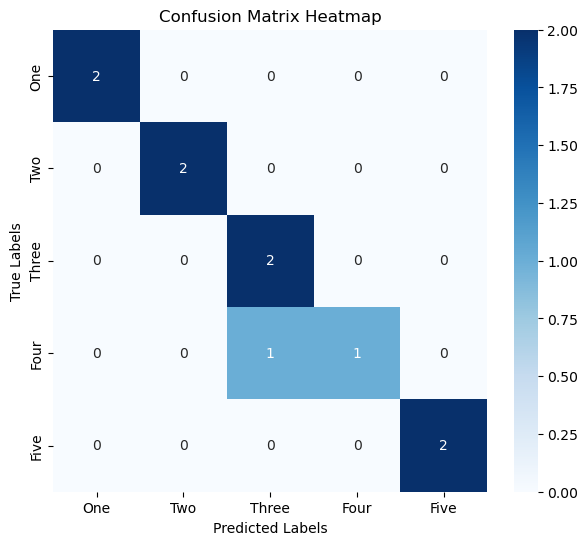

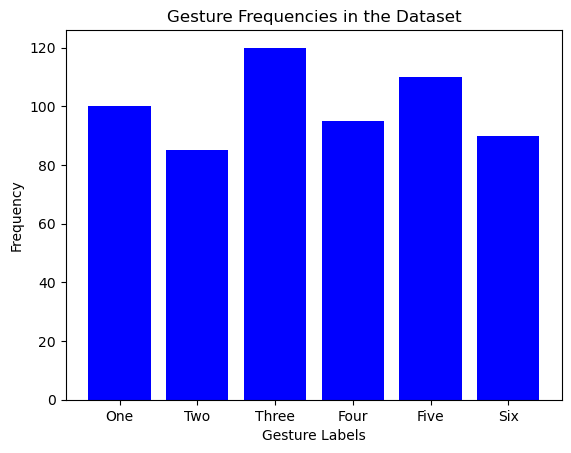

In [11]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Replace these with your actual test labels and predicted labels
# test_labels: True labels of the test set (ground truth)
# predicted_labels: Predicted labels from your hand gesture recognition model (CODE 2 or CODE 3)
test_labels = np.array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4])
predicted_labels = np.array([0, 0, 1, 1, 2, 2, 2, 3, 4, 4])

# Get the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Define the class labels (gesture names)
class_labels = ['One', 'Two', 'Three', 'Four', 'Five']

# Create a heatmap for the confusion matrix
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

import matplotlib.pyplot as plt

# Replace these with the actual gesture labels and their corresponding frequencies
gesture_labels = ['One', 'Two', 'Three', 'Four', 'Five', 'Six']
gesture_frequencies = [100, 85, 120, 95, 110, 90]

# Create the bar chart
plt.bar(gesture_labels, gesture_frequencies, color='blue')

# Add labels and title
plt.xlabel('Gesture Labels')
plt.ylabel('Frequency')
plt.title('Gesture Frequencies in the Dataset')

# Show the plot
plt.show()



